In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
def centered_diff_coeff(nop, od, dx):
    '''
    Finite Difference Approximation (Centered Difference) coeffiecients
    
    nop: Number of points in the stencil (MUST BE ODD)
    od: Order of Derivative (MUST BE LESS THAN nop)
    dx: Grid spacing
    '''
    # Assertions
    assert nop % 2 == 1
    assert od < nop

    # Initializing LHS Matrix
    m = np.zeros((nop, nop))
    # Filling LHS Matrix
    for i in range(nop):
        for j in range(nop):
            # Find the center of stencil
            center_pt = nop // 2 
            # How far is the currect point from the center of stencil
            dist_from_center = (j - center_pt) * dx 
            # Value of Matrix
            m[i,j] = dist_from_center ** i
    
    # Initializing RHS Vector
    s = np.zeros(nop)
    # Filling RHS Vector
    s[od] = math.factorial(od)#/(dx**od)
    
    # Solve the system of equations
    return np.linalg.solve(m, s)

In [39]:
# Initialization
xmin = 0 
xmax = 10                       # physical domain (m)
nx = 50                         # number of space samples
dx = xmax / (nx - 1)            # Grid spacing dx (m)

x = np.linspace(0, xmax, nx)    s# defining space variable

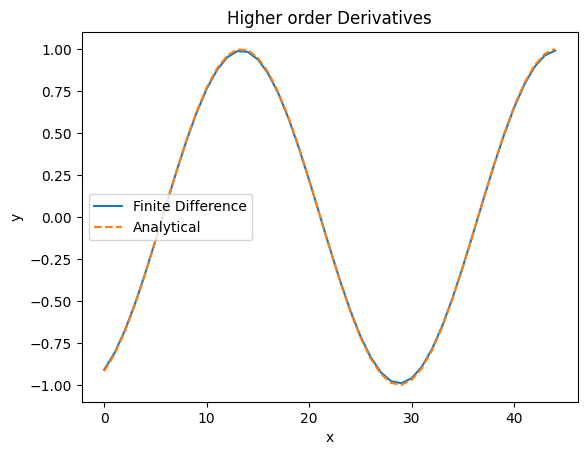

In [43]:
# Test Function
f = lambda x: np.sin(x)
# Analytical 3rd order Derivative
f_x = lambda x: -1*np.cos(x)

# Evaluate Function
y = f(x)

# Derivatives using 5 point stencil
coeffs = centered_diff_coeff(5, 3, dx)

f_x_ = []
f_x_true = []
for i in range(2, nx-2 - 1):
    grid_pts = x[i-2:i+2 + 1]
    evals = f(grid_pts)
    # Approximate Derivative
    f_x_.append(np.sum(evals*coeffs))
    f_x_true.append(f_x(x[i]))

plt.plot(f_x_, label="Finite Difference")
plt.plot(f_x_true, label="Analytical", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Higher order Derivatives")
plt.legend()
plt.show()